[JUG](https://jug.dpieczynski.pl/lab-ead/Lab%2001%20-%20Pandas.html)

In [13]:
import pandas as pd


1. Wczytaj dostarczony plik population_by_country_2019_2020.csv do DataFrame. (źródło: https://www.kaggle.com/tanuprabhu/population-by-country-2020).

In [14]:
df_population = pd.read_csv('population_by_country_2019_2020.csv')

2. Zbadaj zawartość tabeli wyświetlając ją w GUI oraz wyświetlając podsumowanie w konsoli Pythona.

In [15]:
df_population.describe

<bound method NDFrame.describe of     Country (or dependency)  Population (2020)  Population (2019)  \
0                     China         1440297825         1445837915   
1                     India         1382345085         1395931716   
2             United States          331341050          333278784   
3                 Indonesia          274021604          276919651   
4                  Pakistan          221612785          225939807   
..                      ...                ...                ...   
230              Montserrat               4993               4996   
231        Falkland Islands               3497               3600   
232                    Niue               1628               1639   
233                 Tokelau               1360               1377   
234                Holy See                801                803   

     Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  
0            9388211       -348399.0         NaN      38.0  
1            29

3. Policz bezwzględną i względną zmianę populacji w 2020 w stosunku do roku 2019 i umieść w nowych kolumnach, odpowiednio Net population change i Population change [%].

In [16]:

# PROBLEM Z SORTOWANIEM KOLUMN
# population_change = df_population.filter(regex=r"2020|2019").copy()
# df_population["Net population change"] = population_change.iloc[:, 0] - population_change.iloc[:, 1]

population2019 = df_population.filter(regex=r"2019").copy()
population2020 = df_population.filter(regex=r"2020").copy()

df_population["Net population change"] = population2020.iloc[:, 0] - population2019.iloc[:, 0]
df_population['Population change [%]'] = df_population["Net population change"] / population2019.iloc[:, 0] * 100

4. Posortuj dane pod kątem względnej zmiany populacji.

In [17]:
df_population = df_population.sort_values(by=["Population change [%]"], ascending=False)

5. Wygeneruj wykres typu "bar" 10 krajów, które miały największy procentowy przyrost populacji. Zawrzyj na nim populacje z 2019 i 2020. Do wyboru kolumn użyj filtra z wyrażeniem regularnym.

<AxesSubplot:xlabel='Country (or dependency)'>

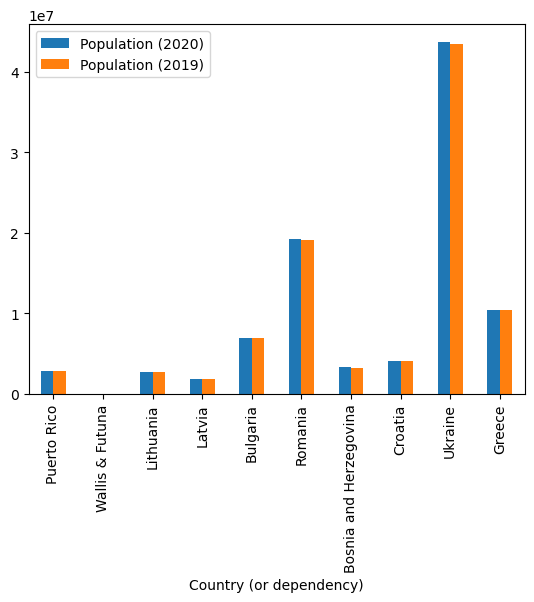

In [18]:
df_population.head(10).plot(x='Country (or dependency)', y=df_population.filter(regex=r"2020|2019").columns, kind='bar')

6. Dodaj kolejną kolumnę Density (2020) i wpisz w niej słowo "Low".

In [19]:
df_population['Density (2020)'] = 'Low'

7. Policz gęstość zaludnienia i w krajach, gdzie przekracza 500 osób na km2 wpisz w kolumnie Density słowo "High".

In [20]:
df_population.loc[df_population['Population (2020)'] / df_population['Land Area (Km²)'] > 500, 'Density (2020)'] = 'High'

8. Wybierz co drugi kraj i zapisz do nowego pliku population_output.csv.

In [21]:
df_population.iloc[1::2, :].to_csv('population_output.csv')

In [22]:
df_population['Density'] = df_population['Population (2020)'] / df_population['Land Area (Km²)']
df_population.sort_values(by=['Density'], ascending=False)

,Country (or dependency),Population (2020),Population (2019),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Net population change,Population change [%],Density (2020),Density
234,Holy See,801,803,0,NaN,NaN,NaN,-2,-0.249066,High,inf
213,Monaco,39290,39568,1,NaN,NaN,NaN,-278,-0.702588,High,3.929000e+04
166,Macao,650846,659736,30,5000.0,NaN,39.0,-8890,-1.347509,High,2.169487e+04
113,Singapore,5858322,5904327,700,27028.0,NaN,42.0,-46005,-0.779174,High,8.369031e+03
103,Hong Kong,7507523,7568350,1050,29308.0,NaN,45.0,-60827,-0.803702,High,7.150022e+03
...,...,...,...,...,...,...,...,...,...,...,...
142,Namibia,2548663,2595038,823290,-4806.0,NaN,22.0,-46375,-1.787064,Low,3.095705e+00
169,Western Sahara,599769,614645,266000,5582.0,NaN,28.0,-14876,-2.420259,Low,2.254771e+00
135,Mongolia,3287242,3340365,1553560,-852.0,NaN,28.0,-53123,-1.590335,Low,2.115941e+00
231,Falkland Islands,3497,3600,12170,NaN,NaN,NaN,-103,-2.861111,Low,2.873459e-01
